In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

In [3]:
p = cv2.imread('patch2.jpg', cv2.IMREAD_GRAYSCALE)

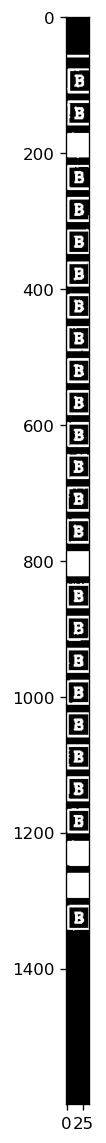

In [4]:
plt.figure(figsize=(10,12))
plt.imshow(p, cmap='gray')

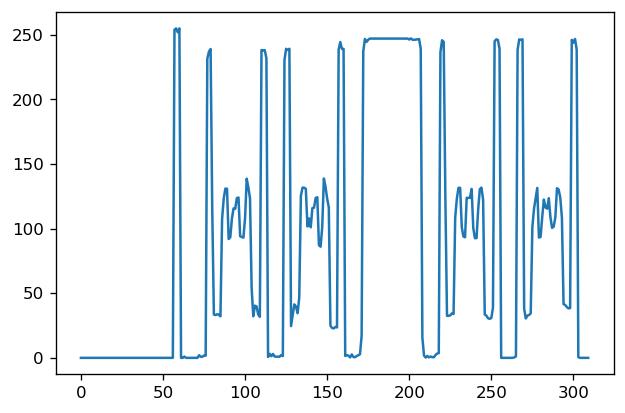

In [5]:
data = np.sum(p, axis=1)/p.shape[1]
plt.plot(np.arange(len(data[:310])), data[:310])

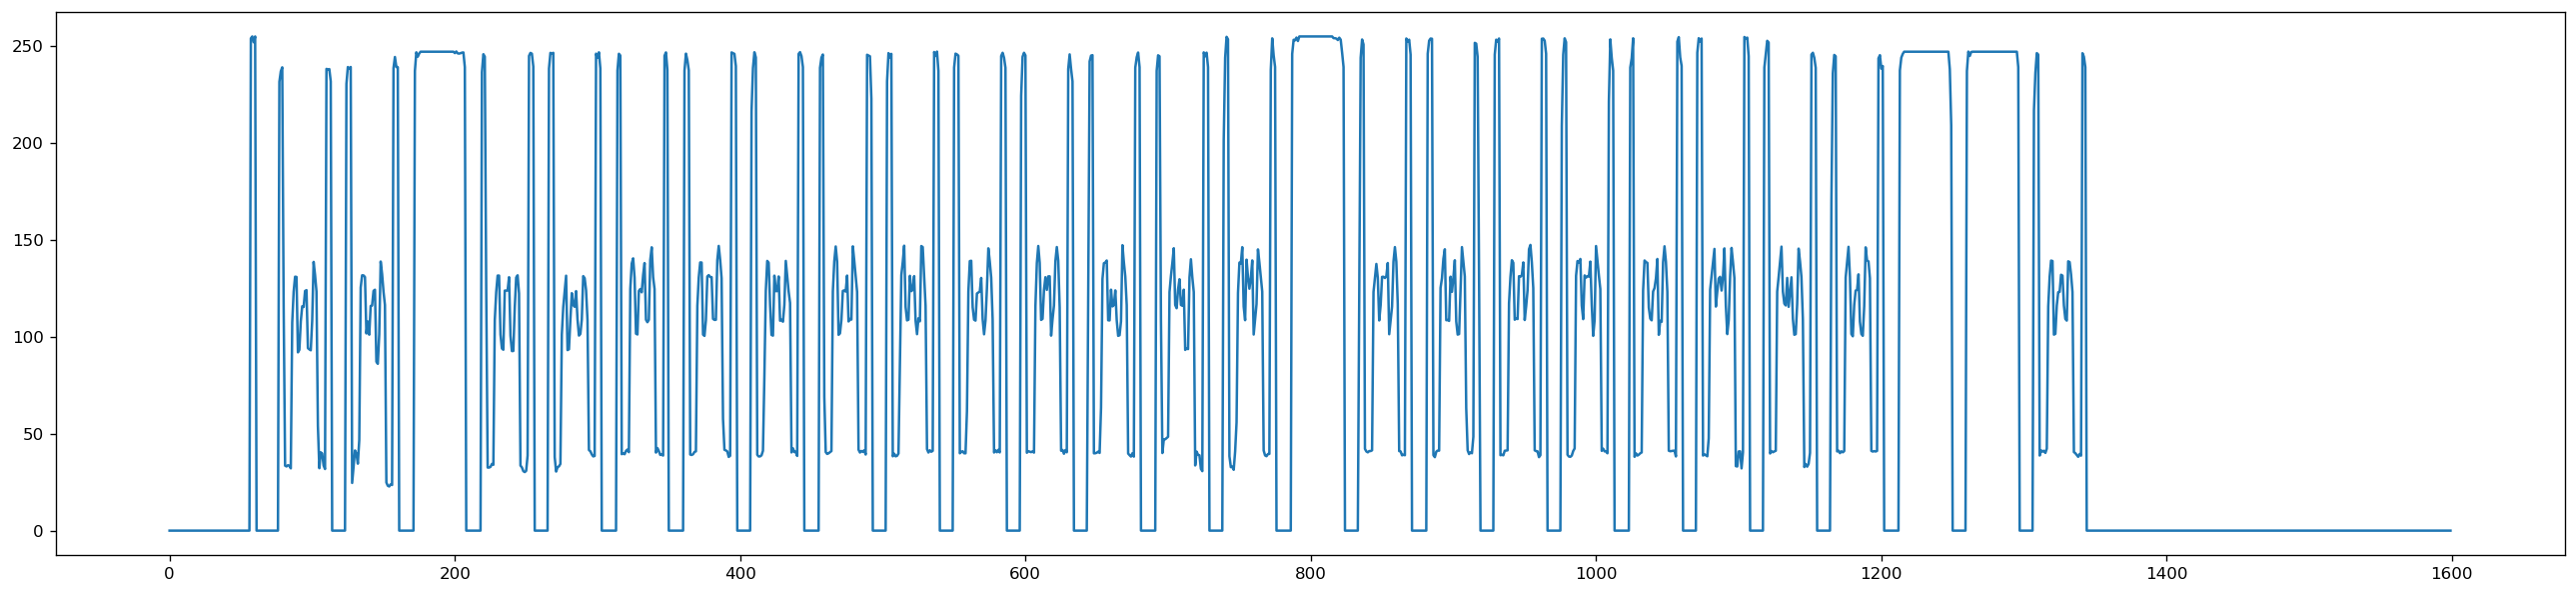

In [49]:
n_clusters=27
plt.figure(figsize=(n_clusters,6))
data_thresh = data.copy()
data_thresh[data_thresh<20] = 0
plt.plot(np.arange(len(data_thresh)), data_thresh)

In [50]:
def connected_components(data):
    labels = np.zeros_like(data).astype(np.uint64)
    n = 0
    for i in range(len(data[1:])):
        left = data[i-1]
        if data[i] != 0:
            if left == 0:
                n += 1
                labels[i] = n
            else:
                labels[i] = n
            
    return labels

cc = connected_components(data_thresh)

In [35]:
unique_labels = np.unique(cc)
color_map = {l:np.random.choice(range(256), size=3).astype(np.float64)/255 for l in unique_labels} #assign random color to each label
color_map[0] = np.array([0, 0, 0])/255

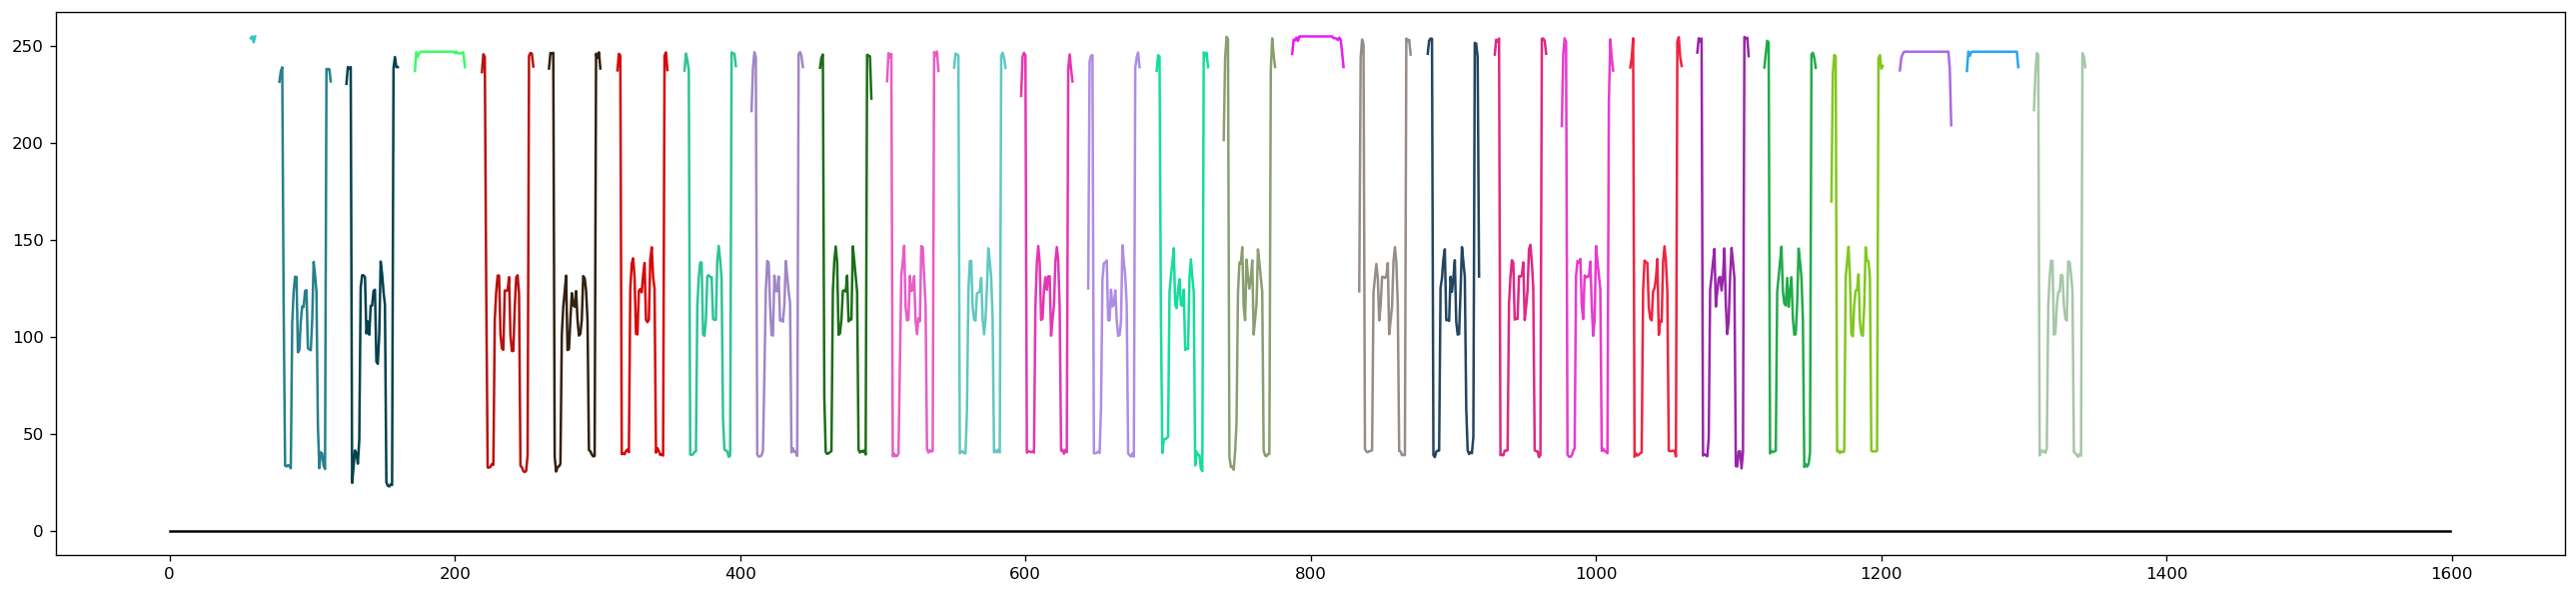

In [36]:
plt.figure(figsize=(n_clusters,6))
# plt.plot(np.arange(len(data_thresh)), data_thresh, color='black')
for c in np.unique(cc):
    plt.plot(np.where(cc==c)[0], data_thresh[cc==c], color=color_map[c])

In [38]:
cs = range(np.unique(cc)[-1])

for c in cs:
    if cc[cc==c].shape[0] < 20:
        cc[cc==c] = 0

In [39]:
np.unique(cc).shape[0]

28

In [21]:
np.mean(data_thresh[cc==2]), np.mean(data_thresh[cc==4])

(113.91318591318591, 246.40824915824916)

In [57]:
len(set(np.unique(cc))-{0})

28

In [51]:
avg_intensity = np.zeros(np.unique(cc).shape[0]-1)
for i,c in enumerate(np.unique(cc)):
    if c!=0:
        avg_intensity[i] = np.mean(data_thresh[cc==c])

IndexError: index 28 is out of bounds for axis 0 with size 28

In [47]:
avg_intensity

array([  1.68490879, 113.91318591, 117.37837838, 246.40824916,
       115.22686323, 121.07534808, 116.26346801, 125.46027846,
       123.86977887, 119.74447174, 125.93202293, 124.82227682,
       125.04832105, 121.08763309, 120.12121212, 125.92383292,
       253.73136773, 124.24733825, 124.2981163 , 128.2031122 ,
       126.08763309, 120.65520066, 128.40622441, 126.81326781,
       122.66011466, 245.47665848, 246.57493857, 118.26863227])